In [62]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

import librosa
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from scipy import signal

from src.signal_processing import load_q_transform_audio_file

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [63]:
song_timestamp_labels_dense_df = pd.read_csv("../dataset/dani_california_structure_labels.csv")
dani_california_mp3 = "../data-cache/dani_california.mp3"
dc_data, sr = librosa.load(dani_california_mp3, sr=None, mono=True)
song_length_in_seconds = len(dc_data) / sr
print(f"Song length in seconds: {song_length_in_seconds:.2f}s")

Song length in seconds: 283.04s


In [39]:
cqt_arr = []
cumulative_dur = 0
spectogram_dur = 0.2
iterations = song_length_in_seconds / spectogram_dur

# TODO: Updated to for loop with tqdm
while cumulative_dur < song_length_in_seconds:
    cqt = load_q_transform_audio_file(dani_california_mp3, start_time_s=cumulative_dur, duration_s=spectogram_dur)
    cqt_arr.append(cqt)
    cumulative_dur += spectogram_dur

print(f"Number of CQTs: {len(cqt_arr)}")

Number of CQTs: 57


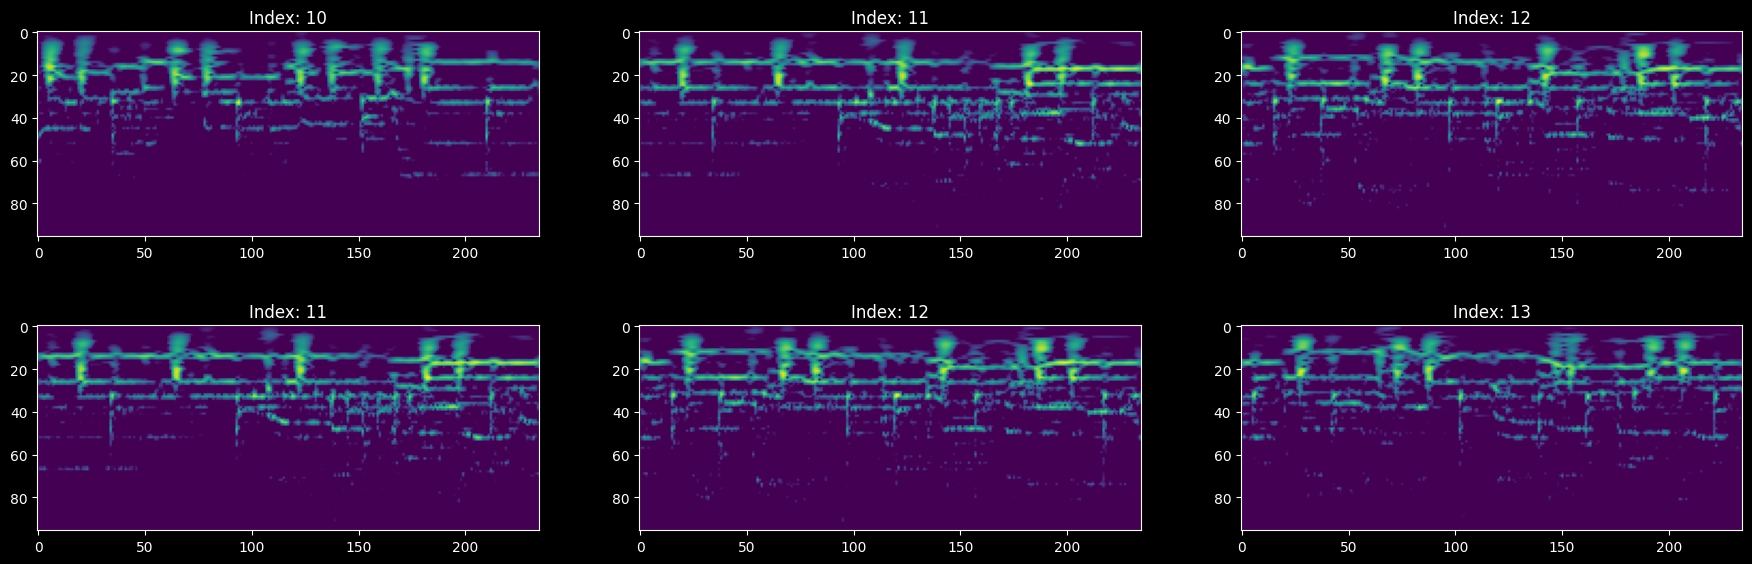

In [43]:
# Display some spectograms
start_index = 10
fig, axes = plt.subplots(2, 3, figsize=(22, 7))

for i in range(2):
    for j in range(3):
        index = start_index + i + j
        ax = axes[i, j]
        ax.set_title(f"Index: {index}")
        ax.imshow(cqt_arr[index])

In [56]:
# Save spectograms
for i, cqt in enumerate(cqt_arr):
    song_part = song_timestamp_labels_dense_df.iloc[i]["song_part"]
    plt.imsave(f"../dataset/spectograms/dani-california-low-res/{i}_{song_part}.png", cqt)

## Create video from high resolution spectograms

In [67]:
import glob

SR = 0.2
frame_rate = 1 / SR
src_img_dir = "../dataset/spectograms/dani-california-hires/"
images = glob.glob(f"{src_img_dir}/*.png")
images.sort()

# Extract dimensions of the first image
sample_img = cv2.imread(images[0])
height, width, layers = sample_img.shape

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v') # or 'XVID'
video = cv2.VideoWriter('output_video.mp4', fourcc, frame_rate, (width, height))

for image in images:
    video.write(cv2.imread(image))

cv2.destroyAllWindows()
video.release()

In [66]:
video

< cv2.VideoWriter 0x13f7d5fd0>